# Pandas (продолжение)

In [1]:
import pandas as pd
import numpy as np

## Упражнение 1

Найдите и выведи индексы пропущенных значений.
Заполните пропущеные значения следующими способами: 

1) Среднимим значения 
2) Медианными значениями 
3) Наиболее часто встечающимися 
4) Линейной интерполяцией 

In [2]:
df = pd.DataFrame({
'ord_no': [70001, np.nan, 70002, 70004, np.nan, 70005, np.nan, 70010, 70003, 70012, np.nan, 70013],
'purch_amt': [150.5, np.nan, 65.26, 110.5, 948.5, np.nan, 5760, 1983.43, np.nan, 250.45, 75.29, 3045.6],
'sale_amt': [10.5, 20.65, np.nan, 11.5, 98.5, np.nan, 57, 19.43, np.nan, 25.45, 75.29, 35.6],
'ord_date': ['2012-10-05', '2012-09-10', np.nan, '2012-08-17', '2012-09-10', '2012-07-27', '2012-09-10', '2012-10-10', '2012-10-10', '2012-06-27', '2012-08-17', '2012-04-25'],
'customer_id': [3002, 3001, 3001, 3003, 3002, 3001, 3001, 3004, 3003, 3002, 3001, 3001],
'salesman_id': [5002, 5003, 5001,np.nan, 5002, 5001, 5001,np.nan, 5003, 5002, 5003,np.nan]})

In [3]:
df

,ord_no,purch_amt,sale_amt,ord_date,customer_id,salesman_id
0,70001.0,150.50,10.50,2012-10-05,3002,5002.0
1,NaN,NaN,20.65,2012-09-10,3001,5003.0
2,70002.0,65.26,NaN,NaN,3001,5001.0
3,70004.0,110.50,11.50,2012-08-17,3003,NaN
4,NaN,948.50,98.50,2012-09-10,3002,5002.0
5,70005.0,NaN,NaN,2012-07-27,3001,5001.0
6,NaN,5760.00,57.00,2012-09-10,3001,5001.0
7,70010.0,1983.43,19.43,2012-10-10,3004,NaN
8,70003.0,NaN,NaN,2012-10-10,3003,5003.0
9,70012.0,250.45,25.45,2012-06-27,3002,5002.0


In [24]:
for colom in df:
    print(colom, df[pd.isna(df[colom]) == True].index)

ord_no Int64Index([1, 4, 6, 10], dtype='int64')
purch_amt Int64Index([1, 5, 8], dtype='int64')
sale_amt Int64Index([2, 5, 8], dtype='int64')
ord_date Int64Index([2], dtype='int64')
customer_id Int64Index([], dtype='int64')
salesman_id Int64Index([3, 7, 11], dtype='int64')


In [6]:
df.fillna(df.mean())

,ord_no,purch_amt,sale_amt,ord_date,customer_id,salesman_id
0,70001.00,150.500000,10.500000,2012-10-05,3002,5002.0
1,70006.25,1376.614444,20.650000,2012-09-10,3001,5003.0
2,70002.00,65.260000,39.324444,NaN,3001,5001.0
3,70004.00,110.500000,11.500000,2012-08-17,3003,5002.0
4,70006.25,948.500000,98.500000,2012-09-10,3002,5002.0
5,70005.00,1376.614444,39.324444,2012-07-27,3001,5001.0
6,70006.25,5760.000000,57.000000,2012-09-10,3001,5001.0
7,70010.00,1983.430000,19.430000,2012-10-10,3004,5002.0
8,70003.00,1376.614444,39.324444,2012-10-10,3003,5003.0
9,70012.00,250.450000,25.450000,2012-06-27,3002,5002.0


In [7]:
df.fillna(df.median())

,ord_no,purch_amt,sale_amt,ord_date,customer_id,salesman_id
0,70001.0,150.50,10.50,2012-10-05,3002,5002.0
1,70004.5,250.45,20.65,2012-09-10,3001,5003.0
2,70002.0,65.26,25.45,NaN,3001,5001.0
3,70004.0,110.50,11.50,2012-08-17,3003,5002.0
4,70004.5,948.50,98.50,2012-09-10,3002,5002.0
5,70005.0,250.45,25.45,2012-07-27,3001,5001.0
6,70004.5,5760.00,57.00,2012-09-10,3001,5001.0
7,70010.0,1983.43,19.43,2012-10-10,3004,5002.0
8,70003.0,250.45,25.45,2012-10-10,3003,5003.0
9,70012.0,250.45,25.45,2012-06-27,3002,5002.0


In [8]:
df.fillna(df.mode())

,ord_no,purch_amt,sale_amt,ord_date,customer_id,salesman_id
0,70001.0,150.50,10.50,2012-10-05,3002,5002.0
1,70002.0,75.29,20.65,2012-09-10,3001,5003.0
2,70002.0,65.26,19.43,NaN,3001,5001.0
3,70004.0,110.50,11.50,2012-08-17,3003,NaN
4,70005.0,948.50,98.50,2012-09-10,3002,5002.0
5,70005.0,948.50,35.60,2012-07-27,3001,5001.0
6,70012.0,5760.00,57.00,2012-09-10,3001,5001.0
7,70010.0,1983.43,19.43,2012-10-10,3004,NaN
8,70003.0,5760.00,98.50,2012-10-10,3003,5003.0
9,70012.0,250.45,25.45,2012-06-27,3002,5002.0


In [9]:
df.fillna(df.interpolate())

,ord_no,purch_amt,sale_amt,ord_date,customer_id,salesman_id
0,70001.0,150.50,10.500,2012-10-05,3002,5002.0
1,70001.5,107.88,20.650,2012-09-10,3001,5003.0
2,70002.0,65.26,16.075,NaN,3001,5001.0
3,70004.0,110.50,11.500,2012-08-17,3003,5001.5
4,70004.5,948.50,98.500,2012-09-10,3002,5002.0
5,70005.0,3354.25,77.750,2012-07-27,3001,5001.0
6,70007.5,5760.00,57.000,2012-09-10,3001,5001.0
7,70010.0,1983.43,19.430,2012-10-10,3004,5002.0
8,70003.0,1116.94,22.440,2012-10-10,3003,5003.0
9,70012.0,250.45,25.450,2012-06-27,3002,5002.0


## Упражнение 2


DataFrame дан ниже


1. Найдите все алмазы которые по любому линейному размеру больше 5.

2. Создайте новый DataFrame в которому исключены все не чсиловые столбы исходного DataFrame. 

3. Расчитатйте средние значения для каждого столбца

4. Пострйоет график средних цен для каждой категории (cut) алмазов.

5. Постройте гистрограмму  веса ('carat') алмазов.

6. Посчитаете все пропущенные занчения в Dataframe

7. Создайте новый DataFrame в которому исключены все строки с пропущенными занчениями

8. Узнайте реальное использование оперативной памяти вашим DataFrame

9. Напишите функцию возращающую 20 случайныз строчек из DataFrame (без повторений)

In [6]:
import pandas as pd
diamonds = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv')

diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [11]:
#Задание 1
mask = ((diamonds["x"]>5)|(diamonds["y"]>5)|(diamonds["z"]>5))
diamonds[mask]

,carat,cut,color,clarity,depth,table,price,x,y,z
90,0.70,Ideal,E,SI1,62.5,57.0,2757,5.70,5.72,3.57
91,0.86,Fair,E,SI2,55.1,69.0,2757,6.45,6.33,3.52
92,0.70,Ideal,G,VS2,61.6,56.0,2757,5.70,5.67,3.50
93,0.71,Very Good,E,VS2,62.4,57.0,2759,5.68,5.73,3.56
94,0.78,Very Good,G,SI2,63.8,56.0,2759,5.81,5.85,3.72
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [37]:
#Задание 2
diamonds2 = diamonds.select_dtypes(include=['int64','float64'])
diamonds2

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [38]:
#Задание 3
diamonds2.mean()

carat       0.797940
depth      61.749405
table      57.457184
price    3932.799722
x           5.731157
y           5.734526
z           3.538734
dtype: float64

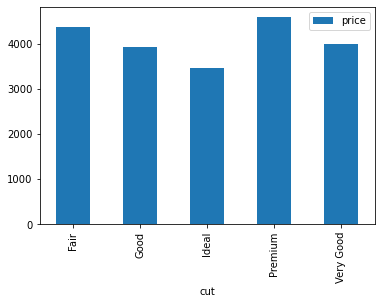

In [36]:
#Задание 4
result = diamonds.groupby(['cut']).agg({'price': 'mean'})

result.plot(kind='bar')
plt.show()

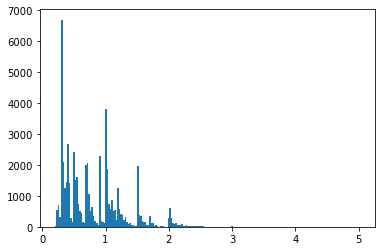

In [35]:
#Задание 5
import matplotlib.pyplot as plt
result = diamonds['carat']
plt.hist(result, bins=200)
plt.show()

In [14]:
#Задание 6
pd.isna(diamonds).mean()

carat      0.0
cut        0.0
color      0.0
clarity    0.0
depth      0.0
table      0.0
price      0.0
x          0.0
y          0.0
z          0.0
dtype: float64

In [7]:
#Задание 7
res = diamonds.dropna(axis='index', how='any')
res

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [8]:
#Задание 8
diamonds.memory_usage()

Index         128
carat      431520
cut        431520
color      431520
clarity    431520
depth      431520
table      431520
price      431520
x          431520
y          431520
z          431520
dtype: int64

In [10]:
#Задание 9
import random
def rand():
    n = np.sort(random.sample(range(len(diamonds)), 20))
    return diamonds.iloc[n]

rand()

,carat,cut,color,clarity,depth,table,price,x,y,z
2260,0.80,Ideal,H,VS2,60.6,56.0,3153,6.03,6.08,3.67
2536,0.90,Fair,D,SI2,65.7,60.0,3205,5.98,5.93,3.91
2575,0.71,Ideal,E,VS1,61.9,54.0,3212,5.74,5.76,3.56
11293,1.00,Very Good,H,VS2,60.7,60.0,4978,6.55,6.49,3.96
14083,1.01,Premium,F,SI1,58.9,60.0,5713,6.57,6.50,3.85
16104,1.01,Ideal,G,VS2,61.7,56.0,6439,6.43,6.46,3.98
16342,1.00,Ideal,H,VVS1,61.5,59.0,6535,6.37,6.41,3.93
16390,1.27,Ideal,E,VS2,61.8,55.0,6543,7.03,6.92,4.31
18672,1.08,Ideal,G,VS1,61.8,58.0,7635,6.56,6.58,4.06
19407,1.25,Premium,G,VS2,61.9,58.0,8064,6.91,6.85,4.26


## Упражнение 3
##### ~определенно не баян~ classic

Наконец-то, пришло время взяться за настоящий дата инжениринг и дата саенс. Датасет [титаник](https://www.kaggle.com/c/titanic).

1. Найдите два отдельных распределения по классам и возрастам пассажиров Титаника.
2. Разделите на две возрастные группы такие, что в них входят одинаковое количество пассажиров определенного класса. Определить такие группы для каждого пола (male/female)
3. На основе полученных групп определите доли выживших. (должно получится 12 чисел)
4. Найдите средний возраст выжившего для каждого из полов на основе полного набора данных
5. Найдите несмещенное среднеквадратическое отклонение возраста для выживших
6. Постройте график зависимости доли выживаемости от возроста
7. Постройте куммулятивный график выживаемости в зависимости от возраста для разных полов
8. Определите общие расходы пассажиров
9. Средих всех пассажиров найдите Екатерин (`Kate`, `Katerina`, `Ekaterina` ...)
10. `*`Определите имена для мужчин и женщин, которые чаще остальных встречались на корабле. Выведите список первых пяти.

In [2]:
import pandas as pd

titanic = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv")

titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
#Задание 1
pclass = titanic.groupby('pclass').agg({'pclass': 'count'})
print(pclass)
age = titanic.groupby('age').agg({'age': 'count'})
print(age)

        pclass
pclass        
1          216
2          184
3          491
       age
age       
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
...    ...
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1

[88 rows x 1 columns]


In [4]:
#Задание 2
import numpy as np
tnotnull = titanic.dropna(subset=['age'], how='all')
def group(pclass, sex):
    grop = tnotnull[(tnotnull['pclass']==pclass)&(tnotnull['sex']==sex)].sort_values(by="age", ascending = False)
    grop1 = grop[:len(grop)//2]
    grop2 = grop[len(grop)//2:]
    return grop1, grop2

for pclass in range(1, 4):
    for sex in ['male', 'female']:
        print(group(pclass, sex))

(     survived  pclass   sex   age  sibsp  parch      fare embarked  class  \
630         1       1  male  80.0      0      0   30.0000        S  First   
96          0       1  male  71.0      0      0   34.6542        C  First   
493         0       1  male  71.0      0      0   49.5042        C  First   
745         0       1  male  70.0      1      1   71.0000        S  First   
456         0       1  male  65.0      0      0   26.5500        S  First   
54          0       1  male  65.0      0      1   61.9792        C  First   
438         0       1  male  64.0      1      4  263.0000        S  First   
545         0       1  male  64.0      0      0   26.0000        S  First   
555         0       1  male  62.0      0      0   26.5500        S  First   
252         0       1  male  62.0      0      0   26.5500        S  First   
170         0       1  male  61.0      0      0   33.5000        S  First   
625         0       1  male  61.0      0      0   32.3208        S  First  

In [5]:
#Задание 3
cl1mo, cl1my = group(1, 'male')
cl2mo, cl2my = group(2, 'male')
cl3mo, cl3my = group(3, 'male')
cl1fo, cl1fy = group(1, 'female')
cl2fo, cl2fy = group(2, 'female')
cl3fo, cl3fy = group(3, 'female')

#print(cl2my)
#a = titanic[(titanic['pclass']==pclass)&(titanic['sex']==sex)].sort_values(by="age", ascending = False)
#print(a[len(a)//2:])

k = pd.DataFrame({"male younger": [cl1my['survived'].mean(), cl2my['survived'].mean() , cl3my['survived'].mean()],
"male older": [cl1mo['survived'].mean(), cl2mo['survived'].mean() , cl3mo['survived'].mean()],
"female younger": [cl1fy['survived'].mean(), cl2fy['survived'].mean() , cl3fy['survived'].mean()],
"female older": [cl1fo['survived'].mean(), cl2fo['survived'].mean() , cl3fo['survived'].mean()]}, index = ["1", "2", "3"])
k

,male younger,male older,female younger,female older
1,0.509804,0.280000,0.953488,0.976190
2,0.200000,0.102041,0.918919,0.918919
3,0.157480,0.142857,0.490196,0.431373


In [6]:
#Задание 4
males = tnotnull[(tnotnull['sex']=='male')&(tnotnull['survived']==1)].agg({'age': 'mean'})[0]
females = tnotnull[(tnotnull['sex']=='female')&(tnotnull['survived']==1)].agg({'age': 'mean'})[0]
print(males, females)

27.276021505376345 28.84771573604061


In [7]:
#Задание 5
tnotnull[tnotnull['survived']==1]['age'].std()

14.950951984140426

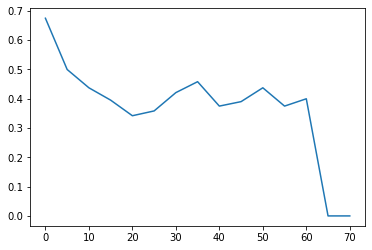

In [50]:
#Задание 6
import matplotlib.pyplot as plt

def data():
    global x, y
    x = []
    y = []
    for i in range(16):
        y.append(tnotnull[(tnotnull['age']>=5*i)&(tnotnull['age']<5*(i+1))].agg({'survived': 'mean'})[0])
        x.append(i*5)
data()
#print(x, y)

plt.plot(x, y)

Text(0.5, 1.0, 'Female')

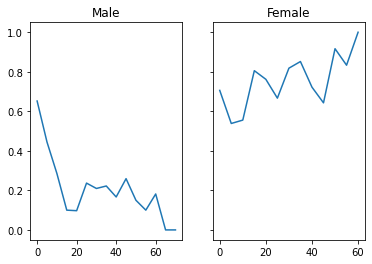

In [87]:
#Задание 7 (не куммулятивные графики)
def datam():
    global xm, ym
    xm = []
    ym = []
    for i in range(16):
        ym.append(tnotnull[(tnotnull['age']>=5*i)&(tnotnull['age']<5*(i+1))&(tnotnull['sex']=='male')].agg({'survived': 'mean'})[0])
        xm.append(i*5)
def dataf():
    global xf, yf
    xf = []
    yf = []
    for i in range(16):
        yf.append(tnotnull[(tnotnull['age']>=5*i)&(tnotnull['age']<5*(i+1))&(tnotnull['sex']=='female')].agg({'survived': 'mean'})[0])
        xf.append(i*5)
datam()
dataf()
#print(xm, ym)
#print(xf, yf)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(xm, ym)
ax1.set_title('Male')
ax2.plot(xf, yf)
ax2.set_title('Female')

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75] []
[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75] [0.7058823529411765, 0.5384615384615384, 0.5555555555555556, 0.8055555555555556, 0.7619047619047619, 0.6666666666666666, 0.8181818181818182, 0.8518518518518519, 0.7222222222222222, 0.6428571428571429, 0.9166666666666666, 0.8333333333333334, 1.0, nan, nan, nan]


ValueError: x and y must have same first dimension, but have shapes (16,) and (0,)

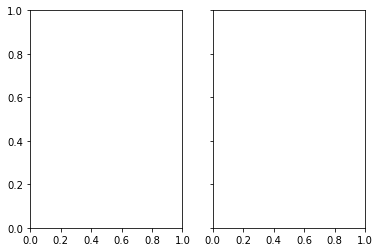

In [86]:
#Задание 7 (куммулятивный график это вот так??(рисуем суммарную выживаемость к определенному возрасту))
#Не работает, при попытке убрать nan элемент из массива срезом весь массив становится пустым
def datam():
    global xm, ym
    xm = []
    ym = []
    for i in range(16):
        ym.append(tnotnull[(tnotnull['age']>=5*i)&(tnotnull['age']<5*(i+1))&(tnotnull['sex']=='male')].agg({'survived': 'mean'})[0])
        xm.append(i*5)
        ym = ym[:-1]
        '''
        ym = ym[::-1]
        for i in range(1, len(ym)):
            ym[i] = ym[i-1]+ym[i]
        ym = ym[::-1]
        '''
def dataf():
    global xf, yf
    xf = []
    yf = []
    for i in range(16):
        yf.append(tnotnull[(tnotnull['age']>=5*i)&(tnotnull['age']<5*(i+1))&(tnotnull['sex']=='female')].agg({'survived': 'mean'})[0])
        xf.append(i*5)
        '''
        yf = yf[::-1]
        for i in range(1, len(yf)):
            yf[i] = yf[i-1]+yf[i]
        yf = yf[::-1]'''
datam()
dataf()
print(xm, ym)
print(xf, yf)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(xm, ym)
ax1.set_title('Male')
ax2.plot(xf, yf)
ax2.set_title('Female')

In [54]:
#задание 8
titanic.agg({'fare': 'sum'})[0]

28693.9493

In [55]:
#Задание 9 и 10
#нет данных про имена пассажиров